In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [64]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [65]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [66]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [67]:
df['species'] = LabelEncoder().fit_transform(df['species'])
df['island'] = LabelEncoder().fit_transform(df['island'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])

df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,NaN,NaN,NaN,NaN,2
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
6,0,2,38.9,17.8,181.0,3625.0,0
7,0,2,39.2,19.6,195.0,4675.0,1
8,0,2,34.1,18.1,193.0,3475.0,2
9,0,2,42.0,20.2,190.0,4250.0,2


In [68]:
df.dropna(inplace=True)

In [69]:
x = df.drop('species', axis=1)
y = df['species']

In [70]:
df.sample(10)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
59,0,0,37.6,19.1,194.0,3750.0,1
161,1,1,51.3,19.9,198.0,3700.0,1
162,1,1,46.6,17.8,193.0,3800.0,0
240,2,0,50.2,14.3,218.0,5700.0,1
46,0,1,41.1,19.0,182.0,3425.0,1
341,2,0,50.4,15.7,222.0,5750.0,1
62,0,0,37.6,17.0,185.0,3600.0,0
61,0,0,41.3,21.1,195.0,4400.0,1
37,0,1,42.2,18.5,180.0,3550.0,0
138,0,1,37.0,16.5,185.0,3400.0,0


In [71]:
x

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,0
340,0,46.8,14.3,215.0,4850.0,0
341,0,50.4,15.7,222.0,5750.0,1
342,0,45.2,14.8,212.0,5200.0,0


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [73]:
clf1 = LogisticRegression(multi_class ='multinomial')
clf1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [74]:
y_pred = clf1.predict(x_test)

In [75]:
accuracy_score(y_test, y_pred)

0.9855072463768116

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [ ]:
x_train_tran = poly.fit_transform(x_train)
x_test_tran = poly.transform(x_test)

In [ ]:
clf = LogisticRegression(multi_class ='multinomial')
clf.fit(x_train_tran, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred2 = clf.predict(x_test_tran)

In [ ]:
accuracy_score(y_test, y_pred2)

1.0

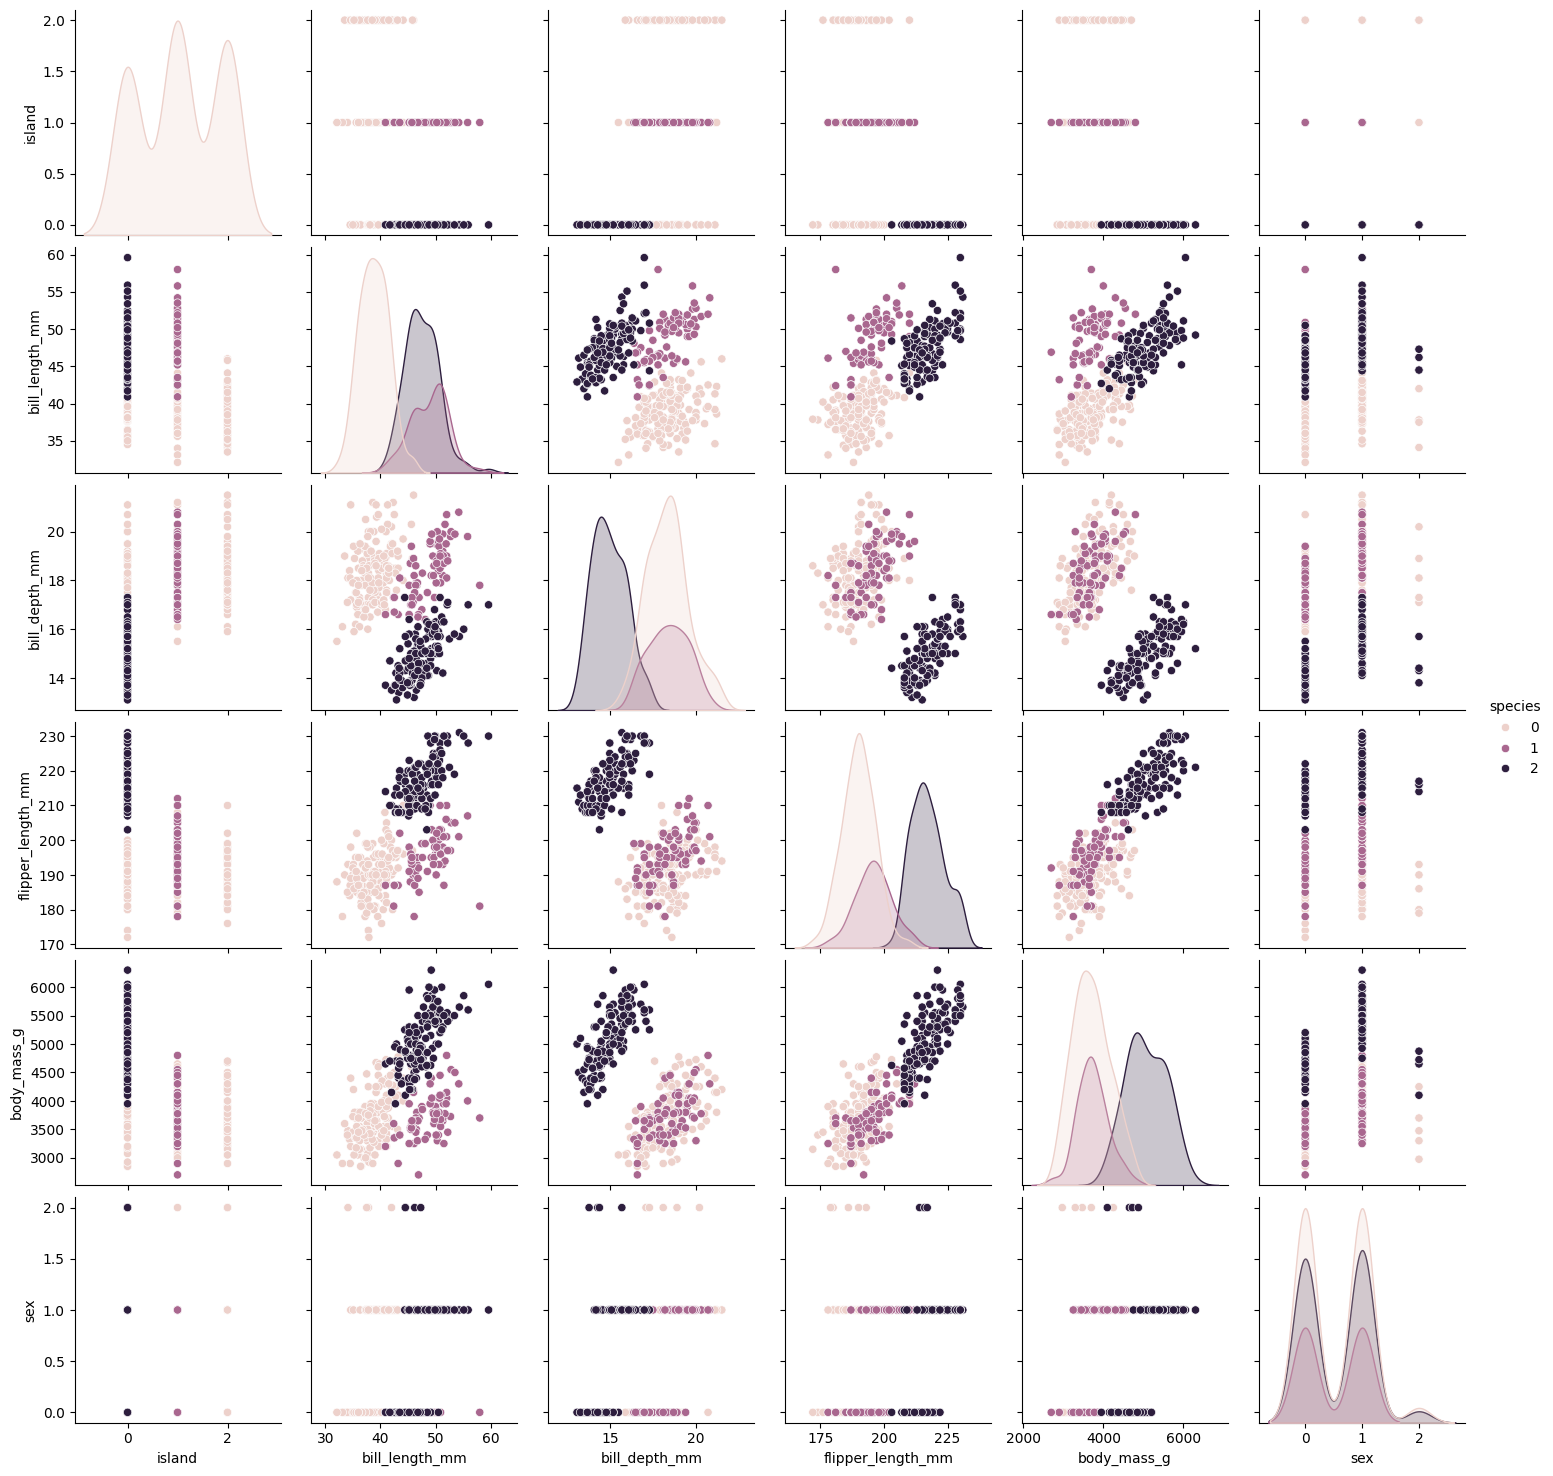

In [ ]:
sns.pairplot(df, hue='species')

array([[1.0000000e+00, 0.0000000e+00, 4.2700000e+01, ..., 1.6605625e+07,
        4.0750000e+03, 1.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 3.4100000e+01, ..., 1.9321000e+08,
        1.1120000e+05, 6.4000000e+01],
       [1.0000000e+00, 1.0000000e+00, 3.7000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 3.8200000e+01, ..., 1.5210000e+07,
        3.9000000e+03, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 4.8500000e+01, ..., 2.8090000e+07,
        5.3000000e+03, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 3.7800000e+01, ..., 1.8062500e+07,
        4.2500000e+03, 1.0000000e+00]])

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
115,0,42.7,18.3,196.0,4075.0,1
8,2,34.1,18.1,193.0,3475.0,2
138,1,37.0,16.5,185.0,3400.0,0
333,0,51.5,16.3,230.0,5500.0,1
305,0,50.8,17.3,228.0,5600.0,1
...,...,...,...,...,...,...
189,1,52.0,20.7,210.0,4800.0,1
72,2,39.6,17.2,196.0,3550.0,0
107,0,38.2,20.0,190.0,3900.0,1
271,0,48.5,14.1,220.0,5300.0,1


In [78]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



In [77]:
import joblib
joblib.dump(clf1, 'Logistic.pkl')

['Logistic.pkl']